# Deep Q-Learning

Despite having no theoritical guarantee of convergence in the non-linear case. Subgradient methods have been shown to perform well in practice when paired with the recent advances in Neural Networks.

- I implemented a version of the algorithm called Deep Q-Learning presented in [Human-level control through deep reinforcement learning](http://www.nature.com/nature/journal/v518/n7540/full/nature14236.html).
- I trained a model on the Atari game "Breakout" where I was able to reproduce the results of the paper, with the agent performing at a human level.
- I also implemented an extension by using Double-Q learning update.

## The Algorithm

The algorithm is the same as subgradient methods where we try to minimize the mean-squared error. But with the Q-value function being parametrized by a small Convolutional Neural Network (CNN). The update used is the following:
$$\theta_{t+1} = \theta_{t} + \alpha(r + \max_aQ_{\theta^\prime}(s_{t+1},a) - Q_{\theta_t}(s_t,a_t))\nabla_{\theta_t} Q_{\theta_t}(s_t,a_t)$$

Instead of updating at every time-step, the transitions are stored in a "replay memory" and a batch of transition is sampled at regular intervals to update the parameters of the network.

Finally, the target $Q_{\theta^\prime}(s_{t+1},a)$ used a set of parameters $\theta^\prime \neq \theta$, with $\theta^\prime$ being updated only every $n$ iterations.

## Results

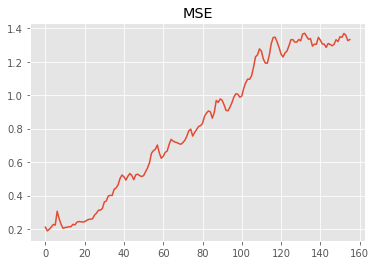

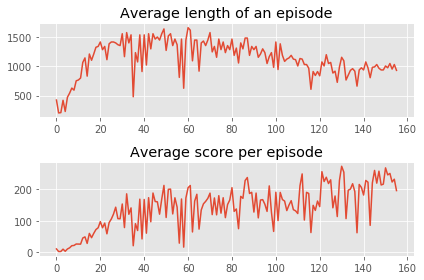

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

path = 'results/breakout/'

mean_loss = np.loadtxt(os.path.join(path,'learning.csv'), delimiter=',', skiprows=1, usecols=2)
results = np.loadtxt(os.path.join(path,'results.csv'), delimiter=',', skiprows=1, usecols=(2,5))

plt.figure(1)
plt.plot(mean_loss)
plt.title('MSE')

plt.figure(2)
plt.subplot(211)
plt.plot(results[:,0])
plt.title('Average length of an episode')
plt.subplot(212)
plt.plot(results[:,1])
plt.title('Average score per episode')
plt.tight_layout()
plt.show()

In [7]:
import io
import base64
from IPython.display import HTML

video = io.open(os.path.join(path, 'video_epoch_1.mp4'), 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [8]:
video = io.open(os.path.join(path, 'video_epoch_10.mp4'), 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [9]:
video = io.open(os.path.join(path, 'video_epoch_50.mp4'), 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [10]:
video = io.open(os.path.join(path, 'video_epoch_150.mp4'), 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))